# Demo: Reproduction

In [1]:
import acmark_model as acmark
from load_dataset import load_data

## load dataset

In [2]:
file_name = './datasets/cora_ml.npz'
S_ori,Label,n,m,k = load_data(file_name)

Selecting 1 largest connected components
number of nodes : 2810
number of edges : 7981
number of classes : 7


In [3]:
d = 10 # number of attributes

In [4]:
S,X,C = acmark.acmark_reproduction(S_ori,Label,d)

finished 10%
finished 20%
finished 30%
finished 40%
finished 50%
finished 60%
finished 70%
finished 80%
finished 90%
number of generated edges : 7717


In [5]:
import matplotlib.pyplot as plt
# import matplotlib.pylab as pltlab
# from scipy import sparse
# import random
import numpy as np
import seaborn as sns

## Class preference matrix of generated graph

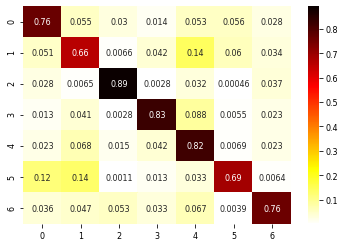

In [6]:
K_heat = np.zeros((k,k))
nnz = S.nonzero()
for i in range(len(nnz[0])):
    if nnz[0][i] < nnz[1][i]:
        K_heat[C[nnz[0][i]]][C[nnz[1][i]]] += 1
        K_heat[C[nnz[1][i]]][C[nnz[0][i]]] += 1

for i in range(k):
    K_heat[i] /= sum(K_heat[i])
plt.rcParams["font.size"] = 8
hm = sns.heatmap(K_heat,annot=True, cmap='hot_r')

## Attribute visualization

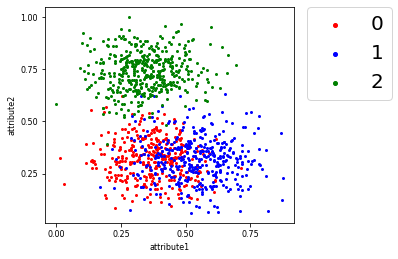

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.rcParams["font.size"] = 20
colors = ['red','blue','green','purple','gold','brown','c','m','k','plum','yellow','pink','maroon','teal','tomato']

partition = []
for i in range(k):
    partition.append([])
for i in range(len(C)):
    partition[C[i]].append(i)

count = 0
for i in partition:
    tmp_ver = []
    tmp_hor = []
    for j in i:
        tmp_ver.append(X[j,0])
        tmp_hor.append(X[j,1])
    ax.scatter(tmp_ver,tmp_hor, c=colors[count],label=count, s=4)
    count+=1
    if count == 3: # how many classes do you want to plot?
        break
        
plt.xlabel("attribute1")
plt.ylabel("attribute2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. , markerscale=2., scatterpoints=1,)
plt.tight_layout()
plt.show()

## changing size

In [8]:
z=12
n=2**z
m=2**(z+5)
d=10

In [9]:
S,X,C = acmark.acmark_reproduction(S_ori,Label,d,n=n,m=m,max_deg=int(n/2**(z-9)))

finished 10%
finished 20%
finished 30%
finished 40%
finished 50%
finished 60%
finished 70%
finished 80%
finished 90%
number of generated edges : 127376
